# Image Data
Performed detailed data prepping and processing on image data

In [16]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=503b68e4eb801cff2c6c79d11e697750041de76c1d7594d5987d8d9b3a20a68e
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


## Step 1: EDA

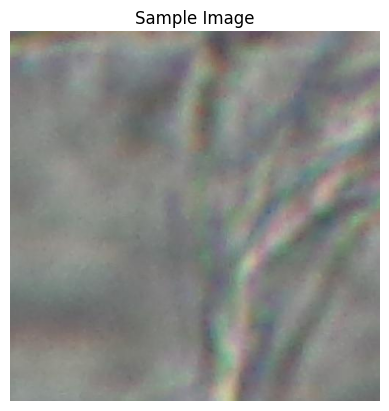

((500, 500), 'RGB')

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load one of the images to get insights
image_path = '/content/H1_1a_1.jpg'
image = Image.open(image_path)

# Get image dimensions and color mode
image_size = image.size  # (width, height)
image_mode = image.mode  # Color mode

# Display the image
plt.imshow(image)
plt.title("Sample Image")
plt.axis("off")
plt.show()

image_size, image_mode


# Step 2: Data Processing

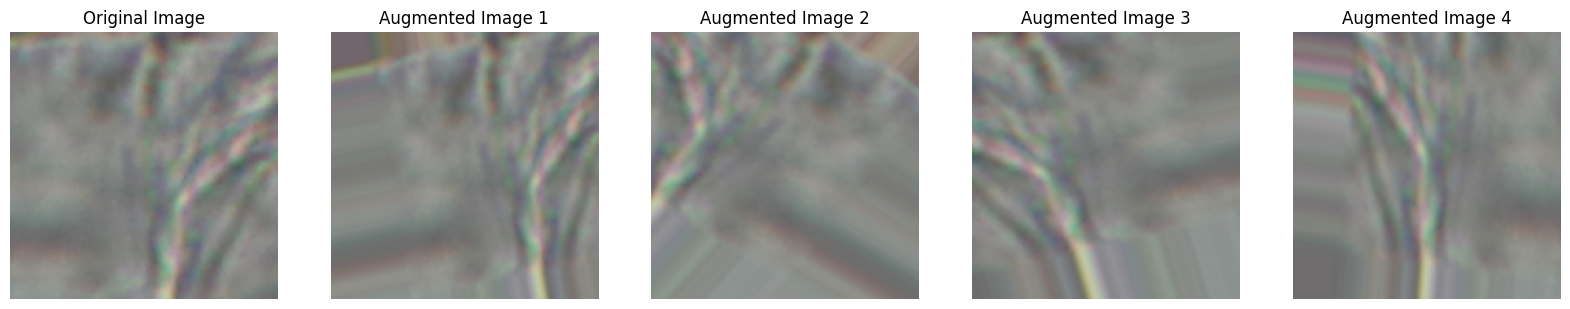

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Resize the image to a smaller dimension (e.g., 128x128)
image_resized = image.resize((128, 128))

# Convert image to numpy array and normalize
image_array = np.array(image_resized) / 255.0

# Expand dimension to include batch size
image_array_expanded = np.expand_dims(image_array, axis=0)

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate few augmented images
augmented_images = []
for i, batch in enumerate(datagen.flow(image_array_expanded, batch_size=1)):
    augmented_images.append(batch[0])
    if i == 3:
        break

# Display the original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
axes[0].imshow(image_array)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, ax in enumerate(axes[1:]):
    ax.imshow(augmented_images[i])
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.show()


## Feature Extraction

In [12]:
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import exposure

# Convert the image to grayscale
gray_image = rgb2gray(image_array)

# Extract HOG features
features, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True, multichannel=False)

# Improve visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))


<ipython-input-12-c9efe950efeb>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),


In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Load and preprocess the image
image = image.load_img(image_path, target_size=(224, 224))
x = gray_image
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Save to DataFrame and then to CSV
df = pd.DataFrame([features])
df.to_csv("image.csv", index=False)


## Model Building & Auto ML

In [28]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
image_h2o = h2o.import_file("image.csv")

aml = H2OAutoML(max_runtime_secs=3600)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 mins 56 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_77jkw8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
